In [105]:
### Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 


In [106]:
### Load in Stock Data
tickers = ['AAPL', 'GOOG', 'MSFT']
start_date = '2018-01-01'

def import_stock_data(tickers, start_date):
    data = pd.DataFrame()
    if len([tickers]) == 1:
        data[tickers] = yf.download(tickers, start_date)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = yf.download(tickers, start_date)['Adj Close']
    # Reset index to make headings in the same row
    data.reset_index(inplace = True)

    data['Date'] = pd.to_datetime(data['Date'])

    return data

stock_data = import_stock_data(tickers, start_date)
stock_data

[*********************100%%**********************]  3 of 3 completed


,Date,AAPL,GOOG,MSFT
0,2018-01-02,40.670971,53.250000,80.080902
1,2018-01-03,40.663902,54.124001,80.453629
2,2018-01-04,40.852772,54.320000,81.161720
3,2018-01-05,41.317905,55.111500,82.167992
4,2018-01-08,41.164433,55.347000,82.251816
...,...,...,...,...
1579,2024-04-12,176.550003,159.190002,421.899994
1580,2024-04-15,172.690002,156.330002,413.640015
1581,2024-04-16,169.380005,156.000000,414.579987
1582,2024-04-17,168.000000,156.880005,411.839996


In [107]:
### Compute RSI for Multiple Tickers 
def calculate_rsi(data, periods, tickers):
    rsi_df = pd.DataFrame(index = data.index)
    rsi_vals = {}

    for t in tickers:
        # Calculate price changes for each ticker
        data[f'{t}_Price Change'] = data[t].diff()
        # Separate gains and losses
        data[f'{t}_Gain'] = data[f'{t}_Price Change'].apply(lambda x: x if x > 0 else 0)
        data[f'{t}_Loss'] = data[f'{t}_Price Change'].apply(lambda x: abs(x) if x < 0 else 0)
        # Calculate average gains and losses over the period
        data[f'{t}_Avg Gain'] = data[f'{t}_Gain'].rolling(window = periods).mean()
        data[f'{t}_Avg Loss'] = data[f'{t}_Loss'].rolling(window = periods).mean()
        # Calculate RS (Relative Strength)
        data[f'{t}_RS'] = data[f'{t}_Avg Gain'] / data[f'{t}_Avg Loss']
        # Calculate RSI using the formula: RSI = 100 - (100 / (1 + RS))
        data[f'{t}_RSI'] = 100 - (100 / (1 + data[f'{t}_RS']))
        # Append RSI column to the DataFrame
        rsi_df[f'RSI_{t}'] = data[f'{t}_RSI']
        # Append last RSI value to rsi_vals dictionary
        rsi_vals[t] = data[f'{t}_RSI'].iloc[-1]

    return rsi_df, rsi_vals

# Call the function to calculate RSI for multiple tickers
rsi_df, rsi_vals = calculate_rsi(stock_data, periods = 14, tickers = tickers)
print(rsi_df)
print("RSI values list: ", rsi_vals)

       RSI_AAPL   RSI_GOOG   RSI_MSFT
0           NaN        NaN        NaN
1           NaN        NaN        NaN
2           NaN        NaN        NaN
3           NaN        NaN        NaN
4           NaN        NaN        NaN
...         ...        ...        ...
1579  58.195794  66.172629  41.960502
1580  53.230333  60.285966  39.737326
1581  49.461661  58.613796  42.082841
1582  40.661275  59.648451  39.834621
1583  41.944842  60.054167  34.776938

[1584 rows x 3 columns]
RSI values list:  {'AAPL': 41.94484246240115, 'GOOG': 60.05416696169369, 'MSFT': 34.77693831857627}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


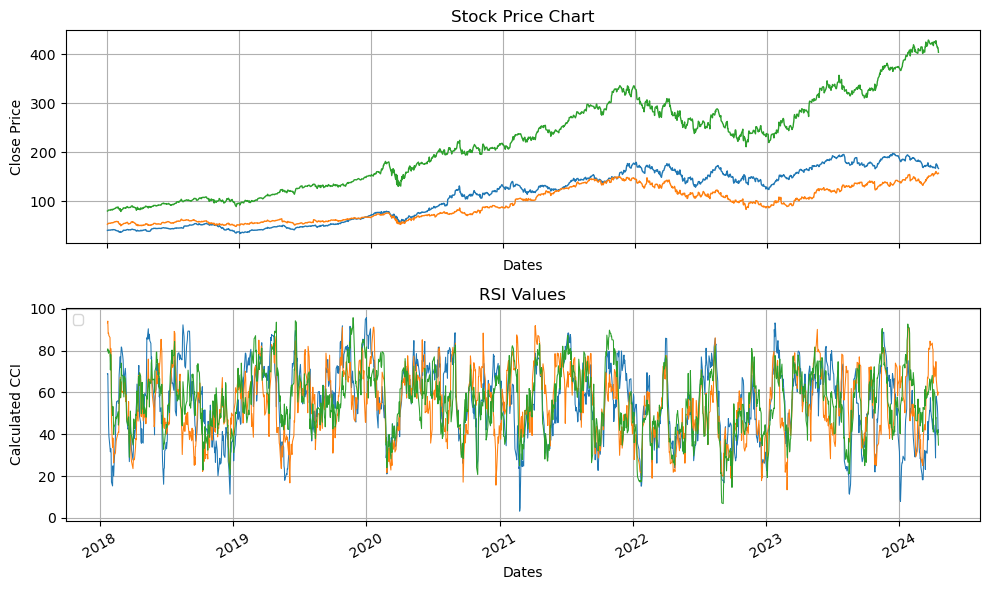

In [111]:
### Plot RSI and Stock DataFrames
# Plot Stocks Analyzed
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])

for t in tickers:
    plt.plot(stock_data['Date'], stock_data[t], lw = 1, label = t)

plt.title('Stock Price Chart')
plt.ylabel('Close Price')
plt.xlabel('Dates')
plt.grid(True)

# Add CCI Subplot
bx = fig.add_subplot(2, 1, 2)

for t in tickers:
    plt.plot(stock_data['Date'], rsi_df[f'RSI_{t}'], lw = 0.75)

plt.title('RSI Values')
plt.legend(loc = 2, prop = {'size': 9.5})
plt.ylabel('Calculated CCI')
plt.xlabel('Dates')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation = 30)
plt.tight_layout()
plt.show()